In [93]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_2d:

In [94]:
#loading data_2d.csv

df_2d = pd.read_csv("hw6_data/data_2d.csv", header=None)
df_2d


,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [95]:
# виокремимо вхідні дані і нормалізуємо їх

X = df_2d.drop(columns=0)
X_scaled = StandardScaler().fit_transform(X)
X_scaled


array([[-2.04352628e+00, -1.09335983e+00],
       [ 7.51050976e-01,  9.70916323e-02],
       [-1.58484322e+00, -1.08738314e+00],
       [-9.30072082e-01, -6.15867957e-01],
       [-1.48855482e+00, -6.70941807e-01],
       [ 2.62097334e-01,  3.01644536e-01],
       [-2.06863457e-01, -7.09895406e-01],
       [-1.10537868e+00, -1.56074511e+00],
       [-1.16220290e+00, -5.71310830e-01],
       [-9.44016349e-01, -1.30204879e+00],
       [-4.91807407e-01, -1.54757132e+00],
       [-6.59964809e-01, -8.39292320e-01],
       [-3.24266453e-01, -2.53585359e-01],
       [-4.81828873e-01,  2.56644621e-01],
       [-1.50115634e+00, -7.48955556e-01],
       [-7.28534367e-01, -7.36677293e-01],
       [-8.69483428e-01, -1.37133304e+00],
       [-1.73916108e-01, -2.88086023e-01],
       [-4.62296817e-01,  4.09191854e-02],
       [ 1.06821095e-01, -2.00669996e+00],
       [-1.84095507e+00, -1.22331021e+00],
       [-9.16131832e-01, -2.45198910e-01],
       [-6.34925218e-01, -5.18145720e-01],
       [ 8.

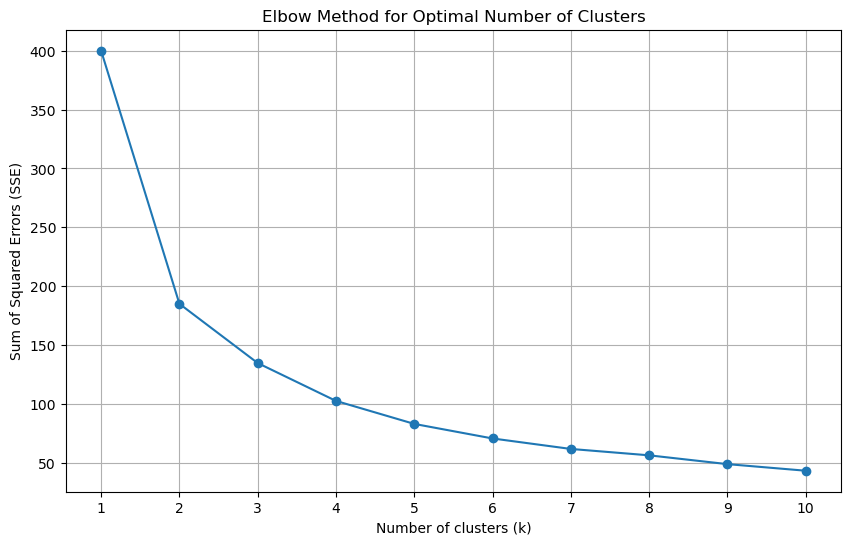

In [96]:
# використаємо метод ліктя для визначання оптимальної кількості кластерів:

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [97]:
# оберемо оптимальну кількість кластерів: з графіку вище видно, що кількість кластерів
# має бути в межах 2-3. Оберемо кількість кластерів = 2, т.я. подальше збільшення
# кластерів не призводить до різкого зменшення SSE

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

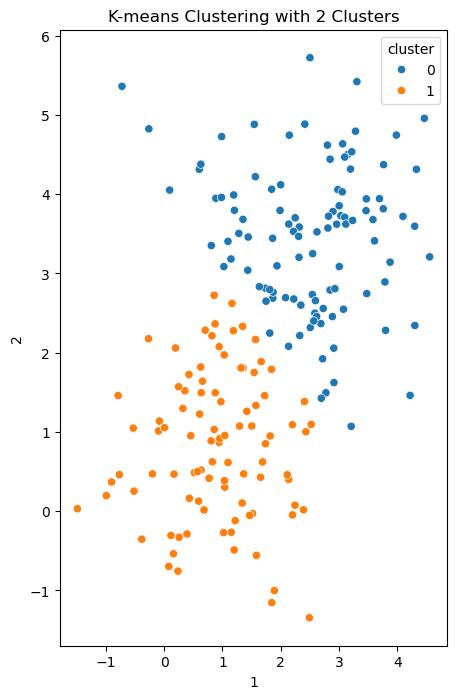

In [98]:
# Візуалізуємо результат:

df_2d["cluster"] = kmeans.labels_

plt.figure(figsize=(5, 8))
sns.scatterplot(data=df_2d, x=1, y=2 , hue='cluster')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.show()

mnist:

In [99]:
#loading mnist.csv

df_mnist = pd.read_csv("hw6_data/mnist.csv", header=None)
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Виокремимо вхідні дані і зменшимо їх розмірність до 2-вимірного варіанту:

X = df_mnist.drop(columns=0)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components


array([[-2.80486648e+02,  4.49274631e+02],
       [-7.18990002e+01, -1.04576371e+03],
       [-9.67815336e+02, -3.48406014e+02],
       [ 1.05443928e+03, -3.53079773e+02],
       [ 4.19035443e+02,  6.73064616e+02],
       [-1.00109098e+03, -3.07086988e+02],
       [-6.25177940e+01,  4.24904666e+02],
       [-1.71804483e+02,  4.31907124e+02],
       [ 1.83549439e+02,  1.73279074e+02],
       [ 9.03229277e+01,  5.56261673e+02],
       [ 9.52889958e+02, -1.00679758e+03],
       [ 3.60421233e+02, -3.30780730e+02],
       [ 3.26796135e+00,  9.38917545e+02],
       [ 1.08169490e+03, -3.53666822e+02],
       [-1.11412029e+03, -4.16229073e+02],
       [ 1.54834002e+02, -6.37226331e+02],
       [ 4.01432514e+02,  9.30951185e+02],
       [-4.37422949e-01,  3.95262961e+02],
       [ 1.41971133e+02, -4.59313911e+02],
       [ 5.61901810e+01,  7.65663609e+02],
       [-2.65475605e+02,  3.43569709e+02],
       [ 3.14990672e+02, -1.20802648e+02],
       [-2.11041046e+01,  1.66115851e+02],
       [-8.

In [101]:
# Нормалізуємо дані:

scaled_components = StandardScaler().fit_transform(principal_components)
X_scaled = pd.DataFrame(data=scaled_components, columns=['Component 1', 'Component 2'])
X_scaled


,Component 1,Component 2
0,-0.479219,0.885143
1,-0.122841,-2.060323
2,-1.653540,-0.686416
3,1.801540,-0.695624
4,0.715934,1.326045
...,...,...
495,1.889049,-0.485756
496,0.155083,1.600779
497,-0.854690,0.548363
498,0.727292,-0.081420


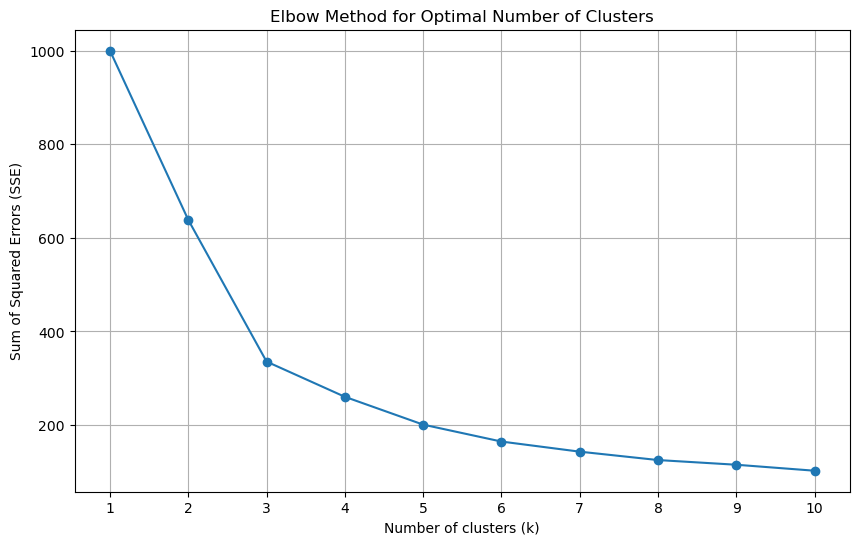

In [102]:
# використуємо метд ліктя для визначння оптимальної квлькості кластерів:

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [103]:
# оберемо оптимальну кількість кластерів = 3, т.я. подальше збільшення
# кластерів не призводить до різкого зменшення SSE

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)


KMeans(n_clusters=3)

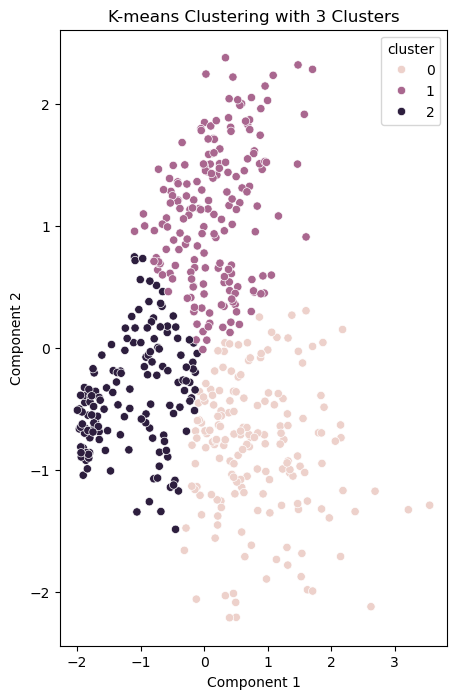

In [104]:
# Візуалізуємо результат:

X_scaled["cluster"] = kmeans.labels_

plt.figure(figsize=(5, 8))
sns.scatterplot(data=X_scaled, x="Component 1", y="Component 2" , hue='cluster')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.show()
